# Ensemble Method

Ensemble Method는 모형 결합(model combining)이라고도 불리는 복수의 예측 모델을 결합하여 모델의 성능을 개선하는 방법론이다.

Ensemble Method의 장점

- 단일 모델 사용 시 발생할 수 있는 성능 분산이 감소한다.
    - 성능 분산 : 교차검증 시 검증셋의 성능 분산
- 과적합 방지
- 일반적으로 성능이 개선되는 경향

Ensembel Method의 방법은 다음과 같이 크게 두가지 방법론으로 구분된다.

- Aggregation(취합)
    - 사용할 모델의 집합이 미리 정의
    - 모든 모델이 같은 문제를 학습
    
    
- Boosting(부스팅)
    - 사용할 모형을 점진적으로 증가
    - 각 모델이 상호보완적으로 학습을 진행

# Voting

Voting은 크게 Hard Voting과 Soft Voting으로 구분된다.

- Hard Voting
    - 단순투표, 개별 모형의 결과 기준
    
    
- Soft Voting
    - 가중치 투표, 개별 모형의 조건부확률의 합을 기준

Voting 방법은 VotingClassifier 클래스를 이용해 사용 가능하다.

- estimators : 모델 리스트, named_parameter 형식으로 입력
    
- voting : 문자열 {hard, soft}로 지정, 디폴트는 hard voting

- weights : 특정 모델에 대한 가중치 설정

다음과 같은 이진분류용 데이터가 있다고 가정할 때 여러 분류모델에 의한 분류 결과와 Voting 방법론을 이용한 결과를 비교해보자.

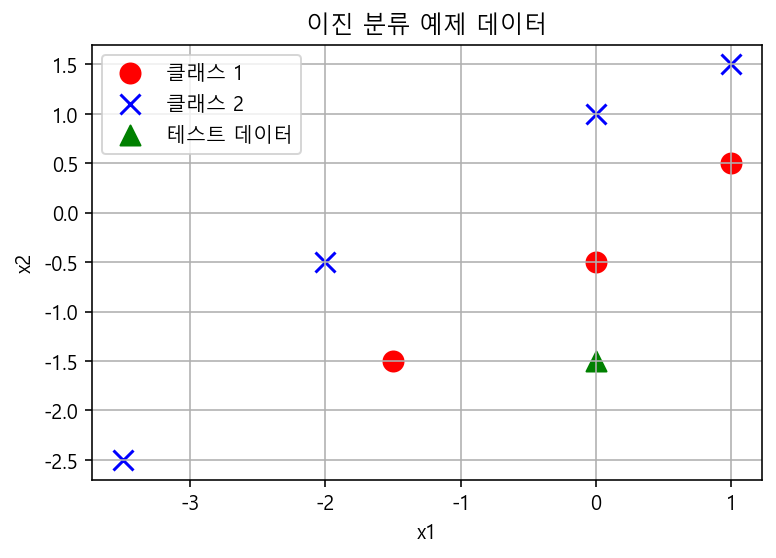

In [2]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="클래스 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="클래스 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("이진 분류 예제 데이터")
plt.legend()
plt.grid()
plt.show()

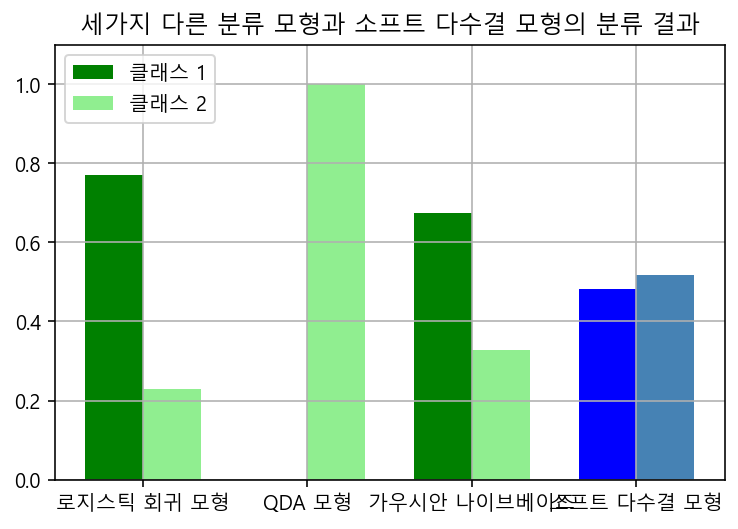

In [7]:
# 분류를 위해 3가지 모델을 사용

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier


model1 = LogisticRegression(random_state=1)# 로지스틱회귀
model2 = QuadraticDiscriminantAnalysis()# QDA
model3 = GaussianNB()# 가우시안 NB

# Voting 분류기 생성, soft 방식
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['로지스틱 회귀 모형', 'QDA 모형', '가우시안 나이브베이즈', '소프트 다수결 모형'])
plt.ylim([0, 1.1])
plt.title('세가지 다른 분류 모형과 소프트 다수결 모형의 분류 결과')
plt.legend([p1[0], p2[0]], ['클래스 1', '클래스 2'], loc='upper left')
plt.grid()
plt.show()

각 모형의 이진분류 pred_proba는 위와 같다.

만약 hard voting이었다면 클래스1을 선택한 모형이 2/3 이므로 Voting 결과는 Class 1이었을 것이다.

하지만 soft voting을 진행했기에 QDA모형의 Pred proba가 높아 최종 분류 결과가 클래스 2로 분류된 것을 확인할 수 있다.

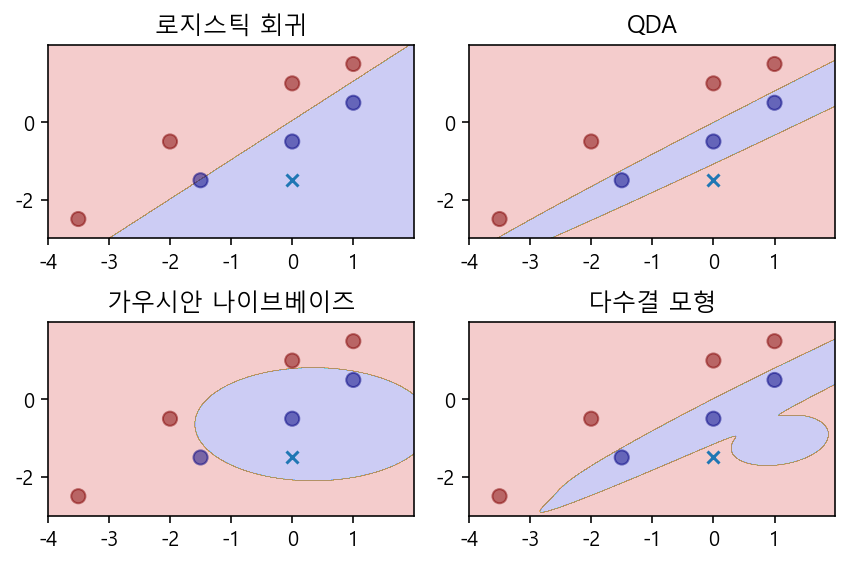

In [10]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['로지스틱 회귀', 'QDA', '가우시안 나이브베이즈', '다수결 모형']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

위 시각화 결과에서 각 모델에 의한 분류 판별선을 비교할 수 있다.

만약 하드보팅으로 진행했다면 Voting 분류기의 최종 분류 판별선은 다음과 같이 변한다.

In [21]:
# voting = hard로 지정

ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='hard')
ensemble.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('qda', QuadraticDiscriminantAnalysis()),
                             ('gnb', GaussianNB())])

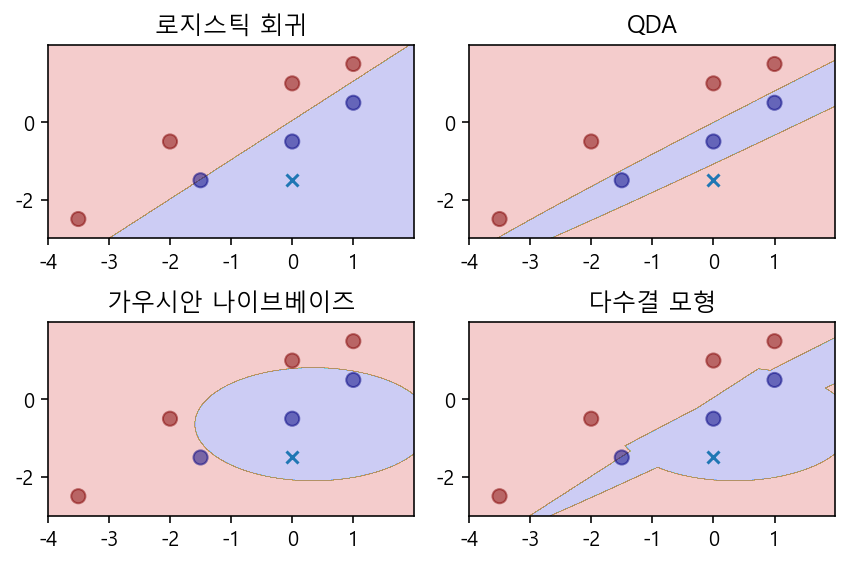

In [22]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['로지스틱 회귀', 'QDA', '가우시안 나이브베이즈', '다수결 모형']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

# Breast cancer data를 이용한 Voting 실습

In [30]:
# 유방암 진단 분류 데이터 로드

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

dfX = pd.DataFrame(X, columns=data.feature_names)
dfy = pd.DataFrame(y, columns=['target'])

df = pd.concat([dfX, dfy], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
# 학습, 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.3)

In [67]:
# 총 4개의 분류기를 이용한 앙상블(보팅)모델 생성

from sklearn.tree import DecisionTreeClassifier

model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3), ('dt', model4)], voting='soft')

linear_model  :  [0.925      0.9625     0.9375     0.97468354 0.91139241] 평균값:  0.94
discriminant_analysis  :  [0.9625     0.925      0.9625     0.97468354 0.93670886] 평균값:  0.95
naive_bayes  :  [0.9        0.9625     0.9875     0.97468354 0.91139241] 평균값:  0.95
tree  :  [0.875      0.9375     0.95       0.93670886 0.89873418] 평균값:  0.92
ensemble  :  [0.9125     0.9625     0.9875     0.97468354 0.93670886] 평균값:  0.95


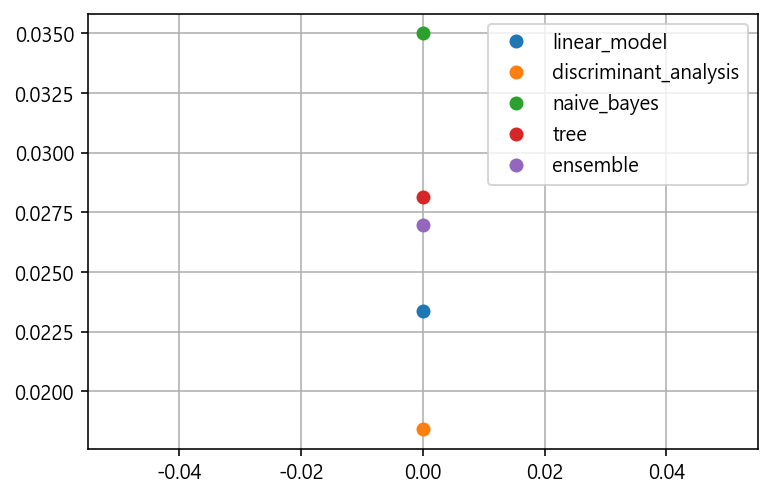

In [156]:
# 여러 모델과 앙상블 모델에 대한 교차검증 후 성능분산 표준편차 비교

from sklearn.model_selection import cross_val_score

models = [model1, model2, model3, model4, ensemble]
for i, model in enumerate(models):
    cross_val_results = []
    cross_val_results.append(cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5))
    print(str(type(model)).split('.', 2)[1], ' : ', cross_val_results[0], '평균값: ',np.round(np.mean(cross_val_results),2))
    plt.plot(np.std(cross_val_results), 'o', label=str(type(model)).split('.', 2)[1])
plt.legend()
plt.grid()
plt.show()

linear_model  :  0.935672514619883
discriminant_analysis  :  0.9649122807017544
naive_bayes  :  0.9239766081871345
tree  :  0.9005847953216374
ensemble  :  0.9590643274853801


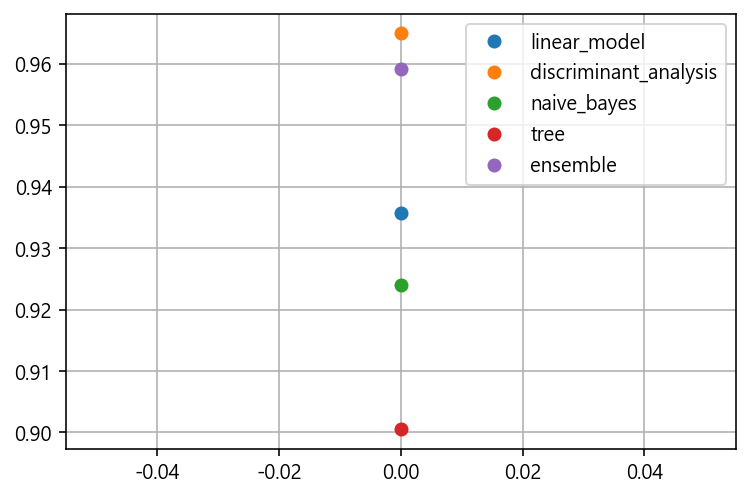

In [160]:
# ACC를 이용한 모델별 성능평가

from sklearn.metrics import accuracy_score

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(str(type(model)).split('.', 2)[1], ' : ', acc)
    plt.plot(acc, 'o', label=str(type(model)).split('.', 2)[1])
plt.legend()
plt.grid()
plt.show()